In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\atorr\OneDrive - Instituto Politecnico Nacional\Documents\Julia Projects\GenDP-main-GITHUB-Ric-MVC\test\raw_results_VC_23022022.csv", header=0)

In [3]:
df['ratio']=df['Value']/df['MinVertexCover']

In [4]:
df.head()

,TreeSize,MinVertexCover,pm,NumPopu,NumGeneration,Value,alg,ratio
0,10,4.0,0.05,5.0,100.0,4.666667,naive,1.166667
1,10,4.0,0.05,5.0,100.0,4.333333,halfGenDP,1.083333
2,10,4.0,0.05,5.0,100.0,4.000000,GenDP,1.000000
3,10,4.0,0.05,10.0,100.0,4.333333,naive,1.083333
4,10,4.0,0.05,10.0,100.0,4.000000,halfGenDP,1.000000


In [5]:
df.round(3)

,TreeSize,MinVertexCover,pm,NumPopu,NumGeneration,Value,alg,ratio
0,10,4.0,0.050,5.0,100.0,4.667,naive,1.167
1,10,4.0,0.050,5.0,100.0,4.333,halfGenDP,1.083
2,10,4.0,0.050,5.0,100.0,4.000,GenDP,1.000
3,10,4.0,0.050,10.0,100.0,4.333,naive,1.083
4,10,4.0,0.050,10.0,100.0,4.000,halfGenDP,1.000
...,...,...,...,...,...,...,...,...
751,170,71.0,0.018,100.0,100.0,80.000,halfGenDP,1.127
752,170,71.0,0.018,100.0,100.0,77.667,GenDP,1.094
753,170,71.0,0.018,100.0,100.0,78.667,naive,1.108
754,170,71.0,0.018,100.0,100.0,82.333,halfGenDP,1.160


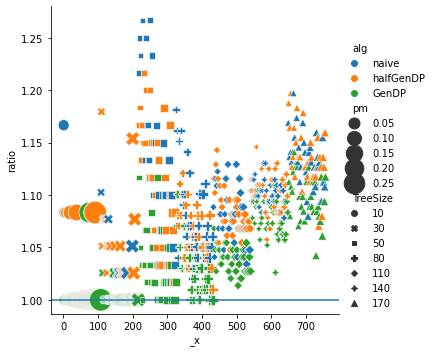

In [6]:
gz = sns.relplot(
    data=df,
    x=np.arange(1,len(df)+1,1), y="ratio", sizes=(50, 500),hue="alg",
    size="pm",style="TreeSize"
)
gz.ax.axhline(1.00)

In [7]:
df_tree= df.groupby(['TreeSize'])

In [8]:
len10=len(df_tree.get_group(10))
len30=len(df_tree.get_group(30))
len50=len(df_tree.get_group(50))
len80=len(df_tree.get_group(80))
len110=len(df_tree.get_group(110))
len140=len(df_tree.get_group(140))
len170=len(df_tree.get_group(170))

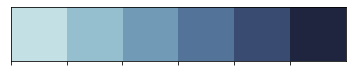

In [9]:
sns.palplot(sns.cubehelix_palette(rot=-.2))

In [10]:
cmap = cmap = sns.cubehelix_palette(as_cmap=True)

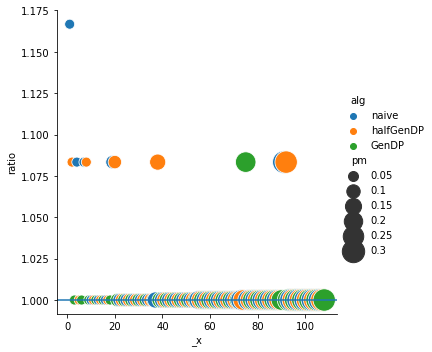

In [11]:
g = sns.relplot(
    data=df_tree.get_group(10),
    x=np.arange(1,len10+1,1), y="ratio", sizes=(100, 500),hue="alg",
    size="pm"
)
g.ax.axhline(1.00)

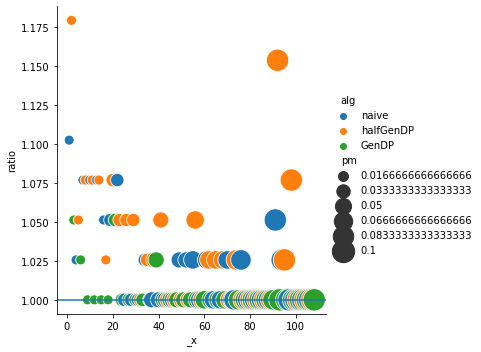

In [12]:
g_30 = sns.relplot(
    data=df_tree.get_group(30),
    x=np.arange(1,len30+1,1), y="ratio", sizes=(100, 500),hue="alg",
    size="pm"
)
g_30.ax.axhline(1.00)

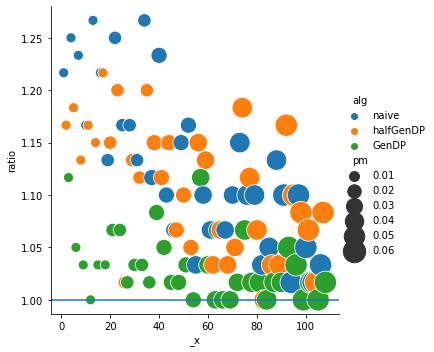

In [13]:
g_50 = sns.relplot(
    data=df_tree.get_group(50),
    x=np.arange(1,len50+1,1), y="ratio", sizes=(100, 500),hue="alg",
    size="pm"
)
g_50.ax.axhline(1.00)

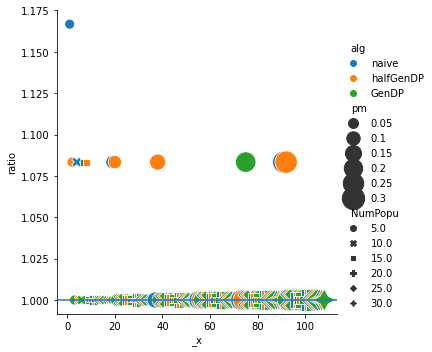

In [14]:
g_popu = sns.relplot(
    data=df_tree.get_group(10),
    x=np.arange(1,len10+1,1), y="ratio", sizes=(100, 500),hue="alg",
    size="pm",style="NumPopu"
)
g_popu.ax.axhline(1.00)

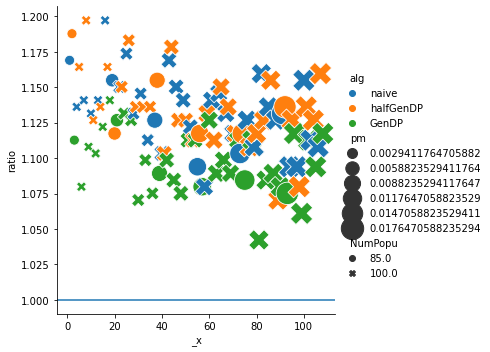

In [15]:
g_170 = sns.relplot(
    data=df_tree.get_group(170),
    x=np.arange(1,len170+1,1), y="ratio", sizes=(100, 500),hue="alg",
    size="pm",style="NumPopu"
)
g_170.ax.axhline(1.00)

In [16]:
df.tail()

,TreeSize,MinVertexCover,pm,NumPopu,NumGeneration,Value,alg,ratio
751,170,71.0,0.017647,100.0,100.0,80.000000,halfGenDP,1.126761
752,170,71.0,0.017647,100.0,100.0,77.666667,GenDP,1.093897
753,170,71.0,0.017647,100.0,100.0,78.666667,naive,1.107981
754,170,71.0,0.017647,100.0,100.0,82.333333,halfGenDP,1.159624
755,170,71.0,0.017647,100.0,100.0,79.333333,GenDP,1.117371


In [65]:

ave = df.groupby(["TreeSize","alg"])["ratio"].mean()
ave

TreeSize  alg      
10        GenDP        1.002315
          halfGenDP    1.011574
          naive        1.013889
30        GenDP        1.004274
          halfGenDP    1.034188
          naive        1.022080
50        GenDP        1.031019
          halfGenDP    1.107870
          naive        1.128241
80        GenDP        1.025814
          halfGenDP    1.061167
          naive        1.077722
110       GenDP        1.038927
          halfGenDP    1.082577
          naive        1.078987
140       GenDP        1.078125
          halfGenDP    1.100116
          naive        1.101997
170       GenDP        1.098200
          halfGenDP    1.135107
          naive        1.132238
Name: ratio, dtype: float64

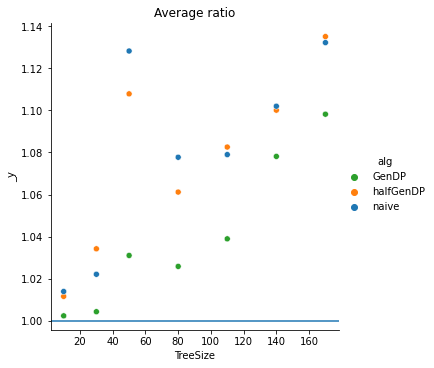

In [53]:
ave_tree = sns.relplot(
    data=ave,
    x="TreeSize", y=ave.values, sizes=(100, 500),hue="alg",palette=["C2", "C1", "C0"]
    
).set(title='Average ratio')
ave_tree.ax.axhline(1.00)

In [64]:
ave_pm = df.groupby(["TreeSize","pm","alg"])["ratio"].mean()
ave_pm.tail()

TreeSize  pm        alg      
170       0.014706  halfGenDP    1.115806
                    naive        1.126761
          0.017647  GenDP        1.096244
                    halfGenDP    1.127543
                    naive        1.115806
Name: ratio, dtype: float64

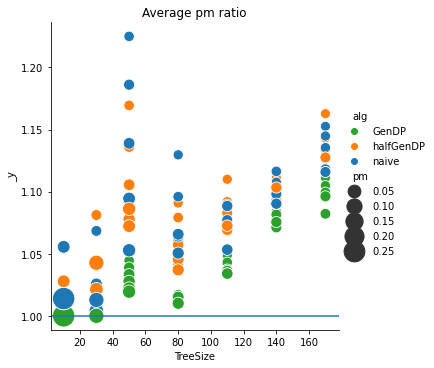

In [62]:
ave_pm_tree = sns.relplot(
    data=ave_pm,
    x="TreeSize", y=ave_pm.values, sizes=(100, 500),hue="alg",size="pm",palette=["C2", "C1", "C0"]
    
).set(title='Average pm ratio')
ave_pm_tree.ax.axhline(1.00)

In [61]:
ave_num_popu = df.groupby(["TreeSize","NumPopu","alg"])["ratio"].mean()
ave_num_popu

TreeSize  NumPopu  alg      
10        5.0      GenDP        1.013889
                   halfGenDP    1.055556
                   naive        1.055556
          10.0     GenDP        1.000000
                   halfGenDP    1.000000
                                  ...   
170       85.0     halfGenDP    1.138498
                   naive        1.129890
          100.0    GenDP        1.098905
                   halfGenDP    1.134429
                   naive        1.132707
Name: ratio, Length: 75, dtype: float64

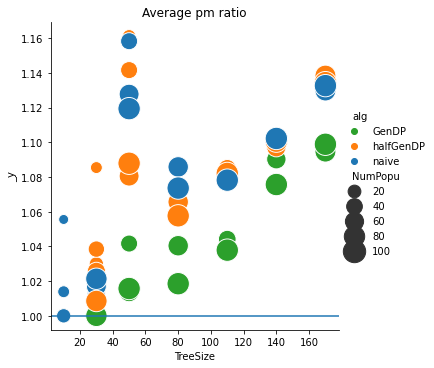

In [63]:
ave_popu_tree = sns.relplot(
    data=ave_num_popu,
    x="TreeSize", y=ave_num_popu.values, sizes=(100, 500),hue="alg",size="NumPopu",palette=["C2", "C1", "C0"]
    
).set(title='Average pm ratio')
ave_popu_tree.ax.axhline(1.00)

In [66]:
df_alg= df.groupby(['alg'])

In [74]:
naive_avg_pm = df_alg.get_group('naive').groupby(["TreeSize","pm"])["ratio"].mean()
naive_avg_pm

TreeSize  pm      
10        0.050000    1.055556
          0.100000    1.013889
          0.150000    1.000000
          0.200000    1.000000
          0.250000    1.000000
          0.300000    1.013889
30        0.016667    1.068376
          0.033333    1.025641
          0.050000    1.008547
          0.066667    1.012821
          0.083333    1.004274
          0.100000    1.012821
50        0.010000    1.225000
          0.020000    1.186111
          0.030000    1.138889
          0.040000    1.072222
          0.050000    1.094444
          0.060000    1.052778
80        0.006250    1.129630
          0.012500    1.095960
          0.018750    1.060606
          0.025000    1.063973
          0.031250    1.065657
          0.037500    1.050505
110       0.004545    1.090703
          0.009091    1.074830
          0.013636    1.089569
          0.018182    1.077098
          0.022727    1.088435
          0.027273    1.053288
140       0.003571    1.107639
          0.007143  

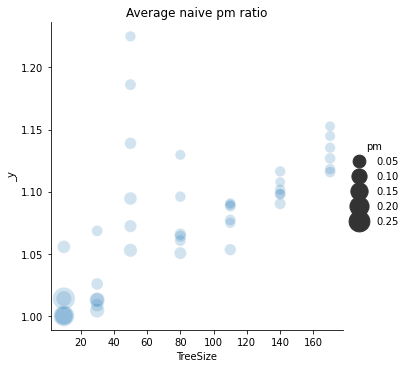

In [75]:
naive_avg_pm_plot = sns.relplot(
    data=naive_avg_pm,
    x="TreeSize", y=naive_avg_pm.values, sizes=(100, 500),size="pm",alpha=0.2
    
).set(title='Average naive pm ratio')
ave_popu_tree.ax.axhline(1.00)

In [101]:
naive_avg_pm_popu = df_alg.get_group('naive').groupby(["TreeSize","pm","NumPopu"])["ratio"].mean()
type(naive_avg_pm_popu)

pandas.core.series.Series

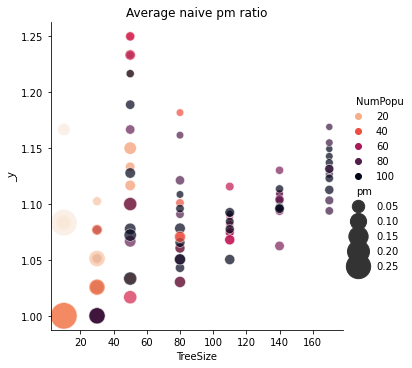

In [94]:
sns.color_palette("mako", as_cmap=True)
naive_avg_pm_popu_plot = sns.relplot(
    data=naive_avg_pm_popu,
    x="TreeSize", y=naive_avg_pm_popu.values,size="pm",hue="NumPopu",alpha=0.7,palette="rocket_r",sizes=(50, 700)
    
).set(title='Average naive pm ratio')
ave_popu_tree.ax.axhline(1.00)

In [95]:
halfDP_avg_pm_popu = df_alg.get_group('halfGenDP').groupby(["TreeSize","pm","NumPopu"])["ratio"].mean()
halfDP_avg_pm_popu

TreeSize  pm        NumPopu
10        0.050000  5.0        1.083333
                    10.0       1.000000
                    15.0       1.083333
                    20.0       1.000000
                    25.0       1.000000
                                 ...   
170       0.011765  100.0      1.129577
          0.014706  85.0       1.117371
                    100.0      1.115493
          0.017647  85.0       1.136150
                    100.0      1.125822
Name: ratio, Length: 150, dtype: float64

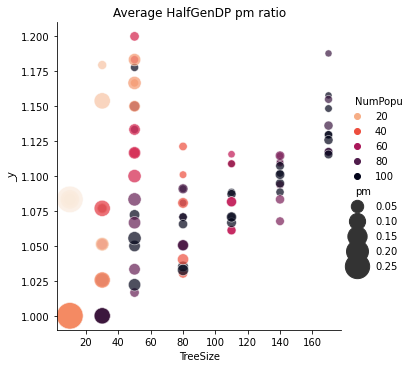

In [96]:
sns.color_palette("mako", as_cmap=True)
halfDP_avg_pm_popu = sns.relplot(
    data=halfDP_avg_pm_popu,
    x="TreeSize", y=halfDP_avg_pm_popu.values,size="pm",hue="NumPopu",alpha=0.7,palette="rocket_r",sizes=(50, 700)
    
).set(title='Average HalfGenDP pm ratio')
ave_popu_tree.ax.axhline(1.00)

In [114]:
df_1 = pd.read_csv(r"C:\Users\atorr\OneDrive - Instituto Politecnico Nacional\Documents\Julia Projects\GenDP-main-GITHUB-Ric-MVC\test\raw_results_VC.csv", header=0)

In [115]:
df_1.head()

,TreeSize,MinVertexCover,pm,NumPopu,NumGeneration,NaiveGA,HalfGenDP,GenDP,NaiveGAAppRatio,HalfGenDPAppRatio,GenDPAppRatio
0,10,5.0,0.05,5.0,100.0,5.0,5.0,5.0,1.0,1.0,1.0
1,10,5.0,0.05,10.0,100.0,5.0,5.0,5.0,1.0,1.0,1.0
2,10,5.0,0.05,15.0,100.0,5.0,5.0,5.0,1.0,1.0,1.0
3,10,5.0,0.05,20.0,100.0,5.0,5.0,5.0,1.0,1.0,1.0
4,10,5.0,0.05,25.0,100.0,5.0,5.0,5.0,1.0,1.0,1.0


In [125]:
df_2 = pd.melt(df_1, id_vars =['TreeSize','MinVertexCover','pm','NumPopu'], value_vars =['NaiveGAAppRatio', 'HalfGenDPAppRatio','GenDPAppRatio'], var_name='algorithm', value_name='ratio')

In [126]:
df_2.tail(20)

,TreeSize,MinVertexCover,pm,NumPopu,algorithm,ratio
736,170,74.0,0.008824,100.0,GenDPAppRatio,1.072072
737,170,74.0,0.008824,100.0,GenDPAppRatio,1.058559
738,170,74.0,0.011765,85.0,GenDPAppRatio,1.090090
739,170,74.0,0.011765,100.0,GenDPAppRatio,1.094595
740,170,74.0,0.011765,100.0,GenDPAppRatio,1.094595
741,170,74.0,0.011765,100.0,GenDPAppRatio,1.103604
742,170,74.0,0.011765,100.0,GenDPAppRatio,1.090090
743,170,74.0,0.011765,100.0,GenDPAppRatio,1.108108
744,170,74.0,0.014706,85.0,GenDPAppRatio,1.090090
745,170,74.0,0.014706,100.0,GenDPAppRatio,1.090090


In [128]:
df_2['algorithm']=df_2['algorithm'].astype('category').cat.codes

In [129]:
df_2.head()

,TreeSize,MinVertexCover,pm,NumPopu,algorithm,ratio
0,10,5.0,0.05,5.0,2,1.0
1,10,5.0,0.05,10.0,2,1.0
2,10,5.0,0.05,15.0,2,1.0
3,10,5.0,0.05,20.0,2,1.0
4,10,5.0,0.05,25.0,2,1.0


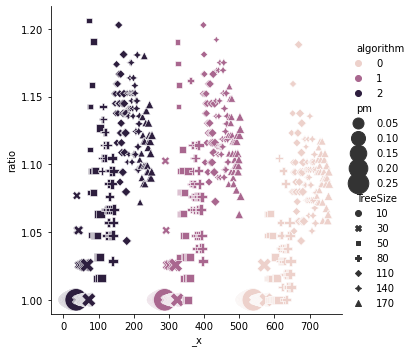

In [130]:
plotsns = sns.relplot(
    data=df_2,
    x=np.arange(1,len(df_2)+1,1), y="ratio", sizes=(50, 500),hue="algorithm",
    size="pm",style="TreeSize"
)
gz.ax.axhline(1.00)

In [132]:
df_2.to_csv('TEST.csv',index=False)

In [135]:
df_shuffle = df_2.sample(frac=1)

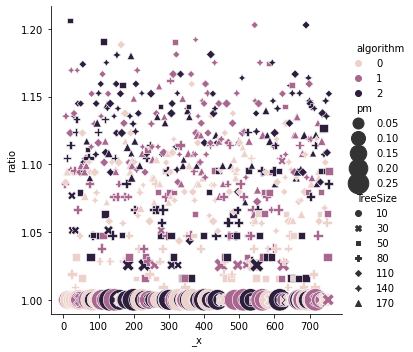

In [136]:
plotsns = sns.relplot(
    data=df_shuffle,
    x=np.arange(1,len(df_shuffle)+1,1), y="ratio", sizes=(50, 500),hue="algorithm",
    size="pm",style="TreeSize"
)
gz.ax.axhline(1.00)